In [1]:
##creating a model to suggest a vaccine given symptoms and age

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [3]:
df = pd.read_csv('/Users/rishabhsharma/Documents/GitHub/Covid-19-application/data/2021VAERSDATA.csv',encoding='latin-1')
df.head()

/var/folders/fj/r2kb_f4d3k1gxmcwsdc81_1r0000gn/T/ipykernel_2375/3013453080.py:1: DtypeWarning: Columns (7,12,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/rishabhsharma/Documents/GitHub/Covid-19-application/data/2021VAERSDATA.csv',encoding='latin-1')


,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na


In [4]:
df.shape

(34121, 35)

In [5]:
df.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [6]:
df.drop(['RECVDATE', 'CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'DIED', 'DATEDIED', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE'
            ,'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY','SPLTTYPE','FORM_VERS', 'TODAYS_DATE', 'OFC_VISIT', 'ER_ED_VISIT'
            ,'L_THREAT', 'PRIOR_VAX', 'BIRTH_DEFECT'], axis=1, inplace=True)

In [7]:
df.shape

(34121, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34121 entries, 0 to 34120
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      34121 non-null  int64  
 1   STATE         28550 non-null  object 
 2   AGE_YRS       30933 non-null  float64
 3   SEX           34121 non-null  object 
 4   SYMPTOM_TEXT  34119 non-null  object 
 5   OTHER_MEDS    20239 non-null  object 
 6   CUR_ILL       16069 non-null  object 
 7   HISTORY       22375 non-null  object 
 8   ALLERGIES     18587 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.3+ MB


In [9]:
df.isnull().sum()

VAERS_ID            0
STATE            5571
AGE_YRS          3188
SEX                 0
SYMPTOM_TEXT        2
OTHER_MEDS      13882
CUR_ILL         18052
HISTORY         11746
ALLERGIES       15534
dtype: int64

In [10]:
df['STATE'].fillna(df['STATE'].mode()[0], inplace=True)
df['AGE_YRS'].fillna(df['AGE_YRS'].mode()[0], inplace=True)

In [11]:
df['SYMPTOM_TEXT'].fillna(df['SYMPTOM_TEXT'].mode()[0], inplace=True)

In [12]:
df['CUR_ILL'].value_counts() ##illness at the time of vaccination

## filling the missing values with "no illness at the time of vaccination"
df['CUR_ILL'].fillna("No illness at the time of vaccination", inplace=True)

In [13]:
df['OTHER_MEDS'].fillna("No medication", inplace=True)  ## filling the missing values with "no medication"

In [14]:
df['HISTORY'] = df['HISTORY'].astype(str) + df['ALLERGIES'].astype(str)

In [15]:
df.drop('ALLERGIES', axis=1, inplace=True)

In [16]:
##changing Na, anNa, none to None in all the columns

df.replace('Na', 'None', inplace=True)
df.replace('anNa', 'None', inplace=True)
df.replace('none', 'None', inplace=True)
df.replace('NONE', 'None', inplace=True)

In [17]:
## replace nannan, NoneNone, nonenone to No history and allergies in history column

df['HISTORY'].replace(['nannan','NoneNone', 'nonenone', 'nanNa', 'NanNa'], 'No history and allergies', inplace=True)

In [18]:
df['CUR_ILL'] = df['CUR_ILL'].apply(lambda x: 'None' if x in df['CUR_ILL'].value_counts()[0:16].index else x)

In [19]:
df.drop([], axis=1, inplace=True)

In [20]:
## counting NAN values in each column

df.isnull().sum()

VAERS_ID        0
STATE           0
AGE_YRS         0
SEX             0
SYMPTOM_TEXT    0
OTHER_MEDS      0
CUR_ILL         0
HISTORY         0
dtype: int64

In [21]:
df.head()

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,OTHER_MEDS,CUR_ILL,HISTORY
0,916600,TX,33.0,F,Right side of epiglottis swelled up and hinder...,None,None,NonePcn and bee venom
1,916601,CA,73.0,F,Approximately 30 min post vaccination administ...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...
2,916602,WA,23.0,F,"About 15 minutes after receiving the vaccine, ...",None,None,NoneShellfish
3,916603,WA,58.0,F,"extreme fatigue, dizziness,. could not lift my...",None,kidney infection,"diverticulitis, mitral valve prolapse, osteoar..."
4,916604,TX,47.0,F,"Injection site swelling, redness, warm to the ...",None,None,No history and allergies


In [22]:
df1 = pd.read_csv('/Users/rishabhsharma/Documents/GitHub/Covid-19-application/data/2021VAERSVAX.csv')

In [23]:
df1.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [24]:
df1.isnull().sum()

VAERS_ID               0
VAX_TYPE               0
VAX_MANU               0
VAX_LOT            11117
VAX_DOSE_SERIES       62
VAX_ROUTE           8401
VAX_SITE            7943
VAX_NAME               0
dtype: int64

In [25]:
df1.columns

Index(['VAERS_ID', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME'],
      dtype='object')

In [26]:
df1.drop(['VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE'], axis = 1, inplace = True)

In [27]:
df.head()

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,OTHER_MEDS,CUR_ILL,HISTORY
0,916600,TX,33.0,F,Right side of epiglottis swelled up and hinder...,None,None,NonePcn and bee venom
1,916601,CA,73.0,F,Approximately 30 min post vaccination administ...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...
2,916602,WA,23.0,F,"About 15 minutes after receiving the vaccine, ...",None,None,NoneShellfish
3,916603,WA,58.0,F,"extreme fatigue, dizziness,. could not lift my...",None,kidney infection,"diverticulitis, mitral valve prolapse, osteoar..."
4,916604,TX,47.0,F,"Injection site swelling, redness, warm to the ...",None,None,No history and allergies


In [28]:
df1.head()

,VAERS_ID,VAX_NAME
0,916600,COVID19 (COVID19 (MODERNA))
1,916601,COVID19 (COVID19 (MODERNA))
2,916602,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,COVID19 (COVID19 (MODERNA))
4,916604,COVID19 (COVID19 (MODERNA))


In [29]:
##merge the two dataframes on VAERS_ID

df = pd.merge(df, df1, on = 'VAERS_ID', how = 'inner')

In [30]:
df.shape

(34630, 9)

In [31]:
df.isnull().any()

VAERS_ID        False
STATE           False
AGE_YRS         False
SEX             False
SYMPTOM_TEXT    False
OTHER_MEDS      False
CUR_ILL         False
HISTORY         False
VAX_NAME        False
dtype: bool

In [32]:
df.drop(['VAERS_ID'], axis = 1, inplace = True)

In [33]:
df.head()

,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,OTHER_MEDS,CUR_ILL,HISTORY,VAX_NAME
0,TX,33.0,F,Right side of epiglottis swelled up and hinder...,None,None,NonePcn and bee venom,COVID19 (COVID19 (MODERNA))
1,CA,73.0,F,Approximately 30 min post vaccination administ...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,COVID19 (COVID19 (MODERNA))
2,WA,23.0,F,"About 15 minutes after receiving the vaccine, ...",None,None,NoneShellfish,COVID19 (COVID19 (PFIZER-BIONTECH))
3,WA,58.0,F,"extreme fatigue, dizziness,. could not lift my...",None,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...",COVID19 (COVID19 (MODERNA))
4,TX,47.0,F,"Injection site swelling, redness, warm to the ...",None,None,No history and allergies,COVID19 (COVID19 (MODERNA))


In [34]:
df['HISTORY'] = df['HISTORY'].apply(lambda x: x[4:] if x.startswith('None') else x)

In [35]:
df.head()

,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,OTHER_MEDS,CUR_ILL,HISTORY,VAX_NAME
0,TX,33.0,F,Right side of epiglottis swelled up and hinder...,None,None,Pcn and bee venom,COVID19 (COVID19 (MODERNA))
1,CA,73.0,F,Approximately 30 min post vaccination administ...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,COVID19 (COVID19 (MODERNA))
2,WA,23.0,F,"About 15 minutes after receiving the vaccine, ...",None,None,Shellfish,COVID19 (COVID19 (PFIZER-BIONTECH))
3,WA,58.0,F,"extreme fatigue, dizziness,. could not lift my...",None,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...",COVID19 (COVID19 (MODERNA))
4,TX,47.0,F,"Injection site swelling, redness, warm to the ...",None,None,No history and allergies,COVID19 (COVID19 (MODERNA))


In [36]:
df['VAX_NAME'].value_counts()[0:10]

COVID19 (COVID19 (PFIZER-BIONTECH))            16534
COVID19 (COVID19 (MODERNA))                    16513
COVID19 (COVID19 (JANSSEN))                     1109
VACCINE NOT SPECIFIED (NO BRAND NAME)             99
ZOSTER LIVE (ZOSTAVAX)                            57
ZOSTER (SHINGRIX)                                 54
INFLUENZA (SEASONAL) (NO BRAND NAME)              47
PNEUMO (PNEUMOVAX)                                23
COVID19 (COVID19 (UNKNOWN))                       18
INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT)       14
Name: VAX_NAME, dtype: int64

<AxesSubplot: >

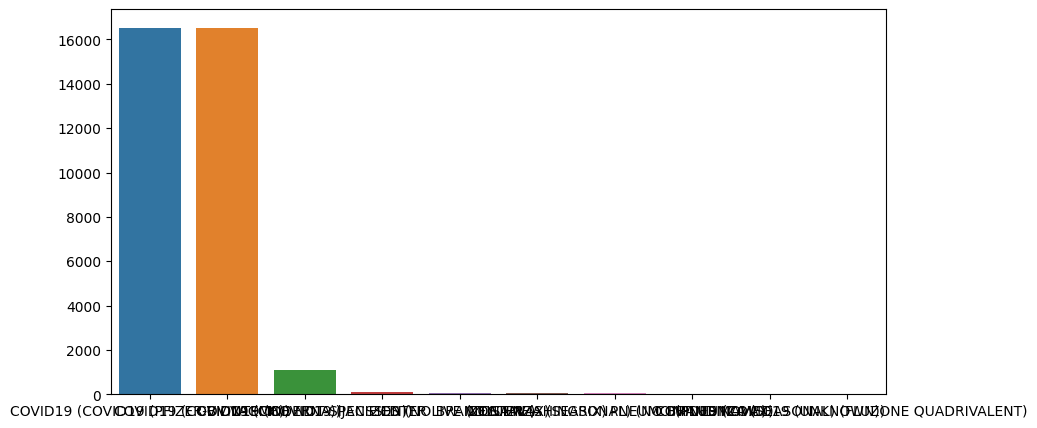

In [37]:
##plot the top 10 vaccines using barplot

plt.figure(figsize=(10,5))
sns.barplot(x = df['VAX_NAME'].value_counts()[0:10].index, y = df['VAX_NAME'].value_counts()[0:10].values)

In [38]:
## if VAX_NAME is not in first 2 vaccines then delete the row

df = df[df['VAX_NAME'].isin(df['VAX_NAME'].value_counts()[0:2].index)]

<AxesSubplot: >

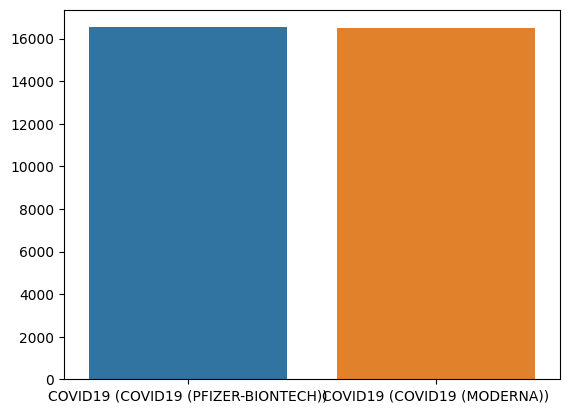

In [39]:
sns.barplot(x = df['VAX_NAME'].value_counts()[0:10].index, y = df['VAX_NAME'].value_counts()[0:10].values)

In [47]:
df.head()

,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,OTHER_MEDS,CUR_ILL,HISTORY,VAX_NAME
0,TX,33.0,F,right side epiglottis swelled hinder swallowin...,none,none,pcn bee venom,COVID19 (COVID19 (MODERNA))
1,CA,73.0,F,approximately 30 min post vaccination administ...,patient residing nursing facility see patients...,patient residing nursing facility see patients...,patient residing nursing facility see patients...,COVID19 (COVID19 (MODERNA))
2,WA,23.0,F,15 minutes receiving vaccine patient complaine...,none,none,shellfish,COVID19 (COVID19 (PFIZER-BIONTECH))
3,WA,58.0,F,extreme fatigue dizziness could lift left arm ...,none,kidney infection,diverticulitis mitral valve prolapse osteoarth...,COVID19 (COVID19 (MODERNA))
4,TX,47.0,F,injection site swelling redness warm touch itchy,none,none,history allergies,COVID19 (COVID19 (MODERNA))


In [49]:
## convert OTHER_MEDS to space if it is none, CUR_ILL to space if it is none, and HISTORY to space if it is no history and allergies

df['OTHER_MEDS'] = df['OTHER_MEDS'].apply(lambda x: ' ' if x == 'None' else x)
df['CUR_ILL'] = df['CUR_ILL'].apply(lambda x: ' ' if x == 'None' else x)
df['HISTORY'] = df['HISTORY'].apply(lambda x: ' ' if x == 'history allergies' else x)

In [54]:
df['HISTORY'].value_counts()[:14]

                                                                                      11501
comments list nonencoded patient relevant history patient relevant history nonenan      678
medical historyconcurrent conditions adverse event reported medical historynan          563
nono                                                                                    260
unknownunknown                                                                          200
medical historyconcurrent conditions adverse event medical history reportednan          190
nannone                                                                                 170
nonenone                                                                                111
nannka                                                                                  103
nannkda                                                                                  90
nka                                                                             